In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Final Data Sheet.csv")


In [3]:
df.head()


,ACE_Bx,ACE_By,ACE_Bz,ACE_x,ACE_y,ACE_z,ACE_Vx,ACE_Temp,MMS_x,MMS_y,MMS_z,Delay
0,1.488999963,-2.039000034,-0.856999993,1447132,-248737,115698,-366.5889893,47278.19922,145278.9672,18583.54091,38541.86319,64.5
1,1.368062511,-1.945250012,-1.30043754,1447131.297,-248737,115697.5313,-366.4565668,47424.09766,145285.3059,18591.37833,38545.29453,NaN
2,1.334624976,-1.85149999,-1.236375049,1447130.594,-248737,115697.0625,-366.3241444,47569.99609,145291.6447,18599.21576,38548.72587,NaN
3,1.251375027,-1.979562566,-1.037750013,1447129.891,-248737,115696.5938,-366.1917219,47715.89453,145297.976,18607.05216,38552.15522,NaN
4,1.125,-2.29400003,-0.410750017,1447129.188,-248737,115696.125,-366.0592995,47861.79297,145304.3073,18614.88856,38555.58458,NaN


In [4]:
# These steps are required to remove the column names after every block (as they are not required)
# Start with the first column that is replaced by zero to get the exact index position for every row with column name
df["ACE_Bx"]=df["ACE_Bx"].replace("ACE_Bx",0)


In [5]:
# and in the code below every other row with column name is replaced by zero (to identify )
df_emp=df[df["ACE_Bx"] == 0].replace(df.columns[1:],0)
df_emp

,ACE_Bx,ACE_By,ACE_Bz,ACE_x,ACE_y,ACE_z,ACE_Vx,ACE_Temp,MMS_x,MMS_y,MMS_z,Delay
80,0,0,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56132,0,0,0,0,0,0,0,0,0,0,0,0
56213,0,0,0,0,0,0,0,0,0,0,0,0
56294,0,0,0,0,0,0,0,0,0,0,0,0
56375,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Remove the rows with zero ( the column names)
df=df.drop(index=df_emp.index.tolist()).reset_index(drop=True)

In [7]:
# Convert the data types to float
print(df.dtypes)


ACE_Bx      object
ACE_By      object
ACE_Bz      object
ACE_x       object
ACE_y       object
ACE_z       object
ACE_Vx      object
ACE_Temp    object
MMS_x       object
MMS_y       object
MMS_z       object
Delay       object
dtype: object


In [8]:
for x in df.columns.tolist():
    df[f"{x}"]=df[f"{x}"].astype(float)

In [9]:
print(df.dtypes)

ACE_Bx      float64
ACE_By      float64
ACE_Bz      float64
ACE_x       float64
ACE_y       float64
ACE_z       float64
ACE_Vx      float64
ACE_Temp    float64
MMS_x       float64
MMS_y       float64
MMS_z       float64
Delay       float64
dtype: object


In [10]:
df.insert(11, "Block", "Block1")
# add the block column just for identifcation 
# the block can also be used to avergae if required

In [11]:
# LOGIC TO FILL IN THE DELAY_VALUE FOR EVERY BLOCK

initial_index=0
block_index=1
final_index=80
while final_index <= df.shape[0]:
    delay_value=df.iloc[initial_index,-1]
    df.iloc[initial_index:final_index,-1]=delay_value
    df.iloc[initial_index:final_index,-2]=f"Block {block_index}"
    initial_index+=80
    final_index+=80
    block_index+=1
    
    

In [12]:
df.tail()

,ACE_Bx,ACE_By,ACE_Bz,ACE_x,ACE_y,ACE_z,ACE_Vx,ACE_Temp,MMS_x,MMS_y,MMS_z,Block,Delay
55835,1.639250,2.642812,-1.282750,1415256.609,-193679.0469,38754.4375,-391.548300,38419.15753,154057.5081,-11224.72079,44372.46083,Block 698,56.25
55836,1.675000,2.629500,-1.169500,1415256.375,-193677.8750,38753.5000,-391.586383,38502.84529,154059.2446,-11218.35104,44373.92096,Block 698,56.25
55837,1.658688,2.637188,-1.132375,1415256.141,-193676.7031,38752.5625,-391.624465,38586.53306,154060.9745,-11211.98084,44375.37917,Block 698,56.25
55838,1.695625,2.681250,-1.063375,1415255.813,-193675.5313,38751.6250,-391.662547,38670.22082,154062.7044,-11205.61064,44376.83739,Block 698,56.25
55839,1.704375,2.710938,-0.892438,1415255.344,-193674.3594,38750.6875,-391.700629,38753.90859,154064.4278,-11199.23999,44378.29367,Block 698,56.25


In [13]:
# Now the values are filled and the preprocessing is done
# We can proceed with adding the heatmap and traning the models
df.isna().sum()

ACE_Bx      0
ACE_By      0
ACE_Bz      0
ACE_x       0
ACE_y       0
ACE_z       0
ACE_Vx      0
ACE_Temp    0
MMS_x       0
MMS_y       0
MMS_z       0
Block       0
Delay       0
dtype: int64

<AxesSubplot:>

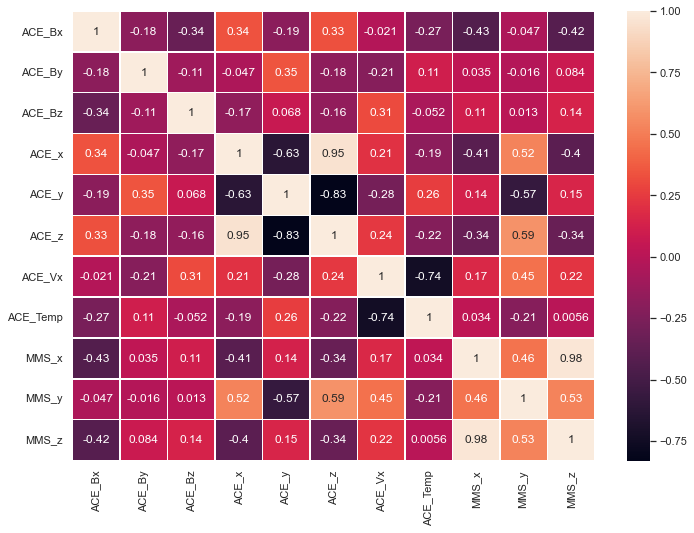

In [14]:
# pearson correlation with the pandas corr()
features = df.iloc[:,0:-2]
sns.heatmap(features.corr(method="pearson"),annot=True,linewidth=0.5)

In [15]:
# function to compute Average Delay
def computeAverageDelay(array):
    avg=[]
    initial_index=0
    final_index=80
    while final_index <= array.shape[0]:
        avg.append(array[initial_index:final_index].mean())
        initial_index+=80
        final_index+=80
    return (np.array(avg))
# evaluate
def evaluate(X_train,y_train,y_train_avg,y_pred_avg,model):
    accuracy=abs(model.score(X_train,y_train))
    rmse = abs(metrics.mean_squared_error(y_train_avg,y_pred_avg,squared=False))
    return (accuracy,rmse)

In [16]:
# get and X and y
X=df.iloc[:,:-2]
y=df.iloc[:,-1]


In [17]:
#Shuffle needs to be false here to make sure that it is divided block wise
# DIVIDE DATA INTO TRAIN AND TEST SPLIT
# OF 20 TRAIN AND 80 TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.20, shuffle=False)

In [18]:
LR20=LinearRegression()
LR20.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred_train = LR20.predict(X_train)
y_pred_train_avg= computeAverageDelay(y_pred_train)

y_pred_test = LR20.predict(X_test)
y_pred_test_avg= computeAverageDelay(y_pred_test)

In [20]:
y_train_avg =computeAverageDelay(y_train)
y_test_avg =computeAverageDelay(y_test)
lr20_accuracy_train, lr20_rmse_train= evaluate(X_train,y_train,
                              y_train_avg,y_pred_train_avg,LR20)
lr20_accuracy_test, lr20_rmse_test= evaluate(X_test,y_test,
                              y_test_avg,y_pred_test_avg,LR20)



In [21]:
# Next do the same process for 50 percent train size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.50, shuffle=False)

LR50=LinearRegression()
LR50.fit(X_train,y_train)

y_pred_train = LR50.predict(X_train)
y_pred_train_avg= computeAverageDelay(y_pred_train)

y_pred_test = LR50.predict(X_test)
y_pred_test_avg= computeAverageDelay(y_pred_test)

y_train_avg =computeAverageDelay(y_train)
y_test_avg =computeAverageDelay(y_test)
lr50_accuracy_train, lr50_rmse_train= evaluate(X_train,y_train,
                              y_train_avg,y_pred_train_avg,LR50)
lr50_accuracy_test, lr50_rmse_test= evaluate(X_test,y_test,
                              y_test_avg,y_pred_test_avg,LR50)


In [22]:
# same process for the 70 percent data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, shuffle=False)

LR70=LinearRegression()
LR70.fit(X_train,y_train)

y_pred_train = LR70.predict(X_train)
y_pred_train_avg= computeAverageDelay(y_pred_train)

y_pred_test = LR70.predict(X_test)
y_pred_test_avg= computeAverageDelay(y_pred_test)

y_train_avg =computeAverageDelay(y_train)
y_test_avg =computeAverageDelay(y_test)
lr70_accuracy_train, lr70_rmse_train= evaluate(X_train,y_train,
                              y_train_avg,y_pred_train_avg,LR70)
lr70_accuracy_test, lr70_rmse_test= evaluate(X_test,y_test,
                              y_test_avg,y_pred_test_avg,LR70)

In [23]:
# plot the accuracy and rmse for the models
# first create the dataframe for it
trainSet_metrics = pd.DataFrame({"Train_Size":["20","50","70"],
             "Accuracy":[lr20_accuracy_train,lr50_accuracy_train,lr70_accuracy_train],
              "RMSE":[lr20_rmse_train,lr50_rmse_train,lr70_rmse_train]})
# use log scale to plot on graph
testSet_metrics = pd.DataFrame({"Train_Size":["20","50","70"],
             "Accuracy":np.log([lr20_accuracy_test,lr50_accuracy_test,lr70_accuracy_test]),
              "RMSE":np.log([lr20_rmse_test,lr50_rmse_test,lr70_rmse_test])})

Text(0.5, 1.0, 'RMSE on train set')

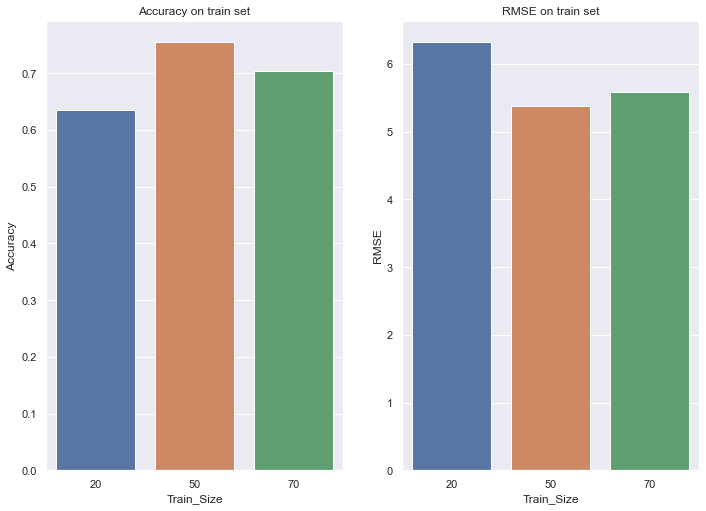

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11.7,8.27))
sns.barplot(x="Train_Size",y="Accuracy",data=trainSet_metrics,ax=ax1).set_title("Accuracy on train set")
sns.barplot(x="Train_Size",y="RMSE",data=trainSet_metrics,ax=ax2).set_title("RMSE on train set")

Text(0.5, 1.0, 'RMSE on test set')

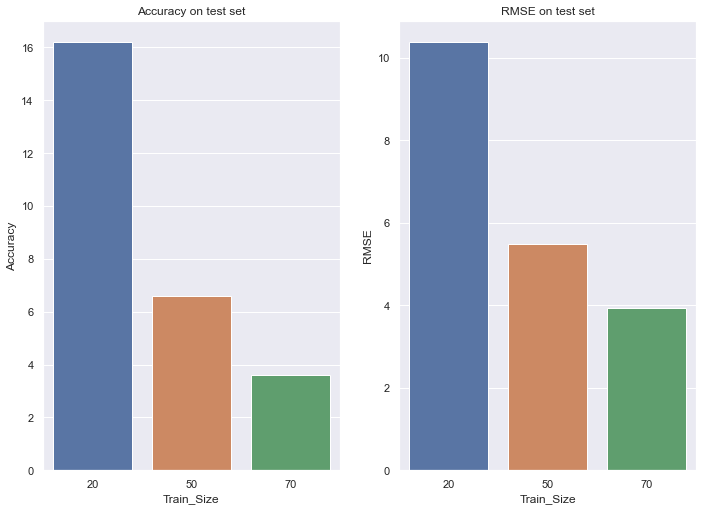

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11.7,8.27))
sns.barplot(x="Train_Size",y="Accuracy",data=testSet_metrics,ax=ax1).set_title("Accuracy on test set")
sns.barplot(x="Train_Size",y="RMSE",data=testSet_metrics,ax=ax2).set_title("RMSE on test set")